## Multi-layer Perceptron for image classification

Define libraries to Import

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, datasets

Download the CIFAR1O dataset.
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

Verify the data. Lets display some images

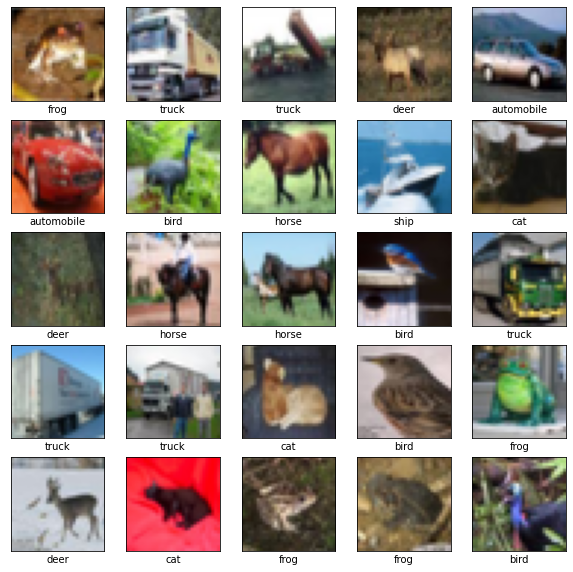

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Multi-layer Perceptron has a very low number of layers, with fully connected layers.

In [5]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels,
        epochs=200,
        verbose=1,
        batch_size=128,
        validation_data=(test_images, test_labels))

Epoch 1/200
391/391 [==============================] - 9s 11ms/step - loss: 2.1030 - accuracy: 0.2548 - val_loss: 1.8167 - val_accuracy: 0.3470
Epoch 2/200
391/391 [==============================] - 2s 4ms/step - loss: 1.8040 - accuracy: 0.3601 - val_loss: 1.7432 - val_accuracy: 0.3935
Epoch 3/200
391/391 [==============================] - 2s 4ms/step - loss: 1.7235 - accuracy: 0.3937 - val_loss: 1.7016 - val_accuracy: 0.3890
Epoch 4/200
391/391 [==============================] - 1s 4ms/step - loss: 1.6742 - accuracy: 0.4144 - val_loss: 1.6657 - val_accuracy: 0.4120
Epoch 5/200
391/391 [==============================] - 1s 4ms/step - loss: 1.6341 - accuracy: 0.4259 - val_loss: 1.6254 - val_accuracy: 0.4284
Epoch 6/200
391/391 [==============================] - 1s 4ms/step - loss: 1.6195 - accuracy: 0.4289 - val_loss: 1.6416 - val_accuracy: 0.4220
Epoch 7/200
391/391 [==============================] - 2s 4ms/step - loss: 1.5988 - accuracy: 0.4345 - val_loss: 1.6087 - val_accuracy: 0.428

## Evaluate the Model

In [9]:
range(1, len(history.history['loss'])+1)

range(1, 201)

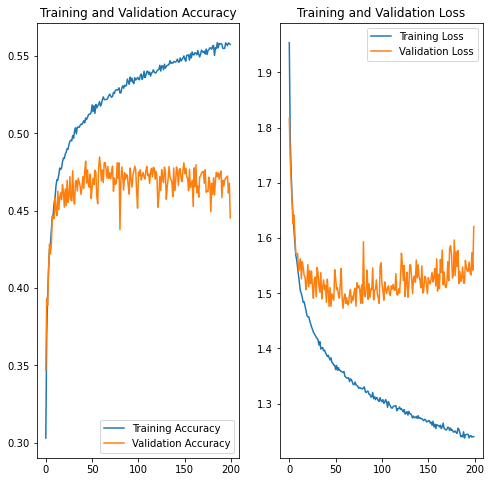

In [10]:
def plot_history(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

epochs=200
plot_history(history, epochs)

## Make Predictions

In [11]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(test_images)

We have 10 classes in the dataset. Lets see what the model says abot the first prediction.

In [13]:
predictions[0]

array([2.01178025e-02, 3.36635811e-03, 1.36865661e-01, 1.91581845e-01,
       1.02075100e-01, 1.11713156e-01, 1.89171564e-02, 1.92266877e-03,
       4.13406461e-01, 3.38184946e-05], dtype=float32)

In [14]:
# We are interested in the first prediction:
np.argmax(predictions[0])

8

In [15]:
# Lets check the ground truth:
test_labels[0][0]

3

In [16]:
# Lets display some predictions:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label[0]:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

Plot some predicted images.

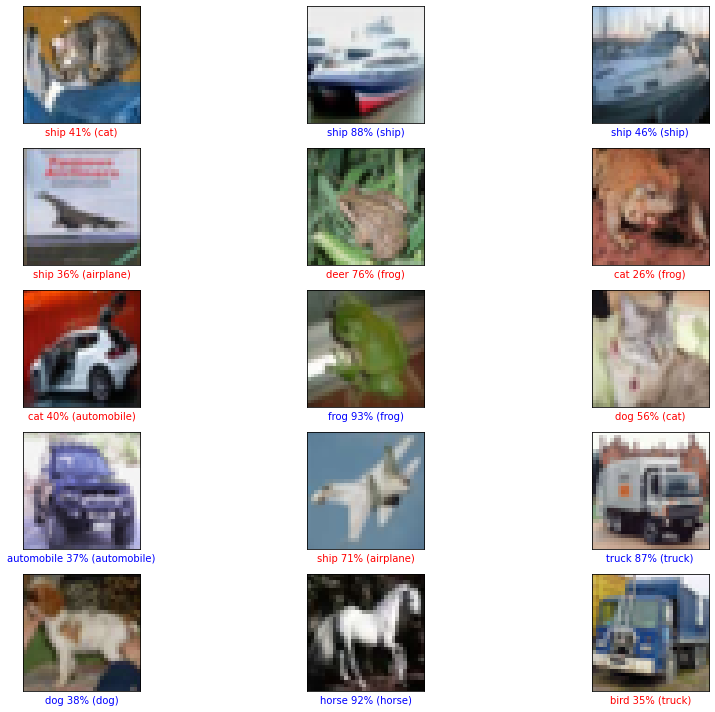

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  #plt.subplot(num_rows, 2*num_cols, 2*i+2)
  #plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()